In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# Load data

data = json.load(open('github_commits.json'))

In [4]:

# Convert the JSON data into a DataFrame
commits_df = pd.DataFrame([{
    "author": commit['commit']['author']['name'],
    "date": datetime.strptime(commit['commit']['author']['date'], '%Y-%m-%dT%H:%M:%SZ')
} for commit in data])

In [5]:

# Grouping commits by date (daily) and calculating unique authors and commit count
commits_df['date_only'] = commits_df['date'].dt.date
commit_counts = commits_df.groupby('date_only').size().rename('commits')
unique_authors = commits_df.groupby('date_only')['author'].nunique().rename('unique_authors')

# Create a DataFrame with both metrics
analysis_df = pd.concat([commit_counts, unique_authors], axis=1)

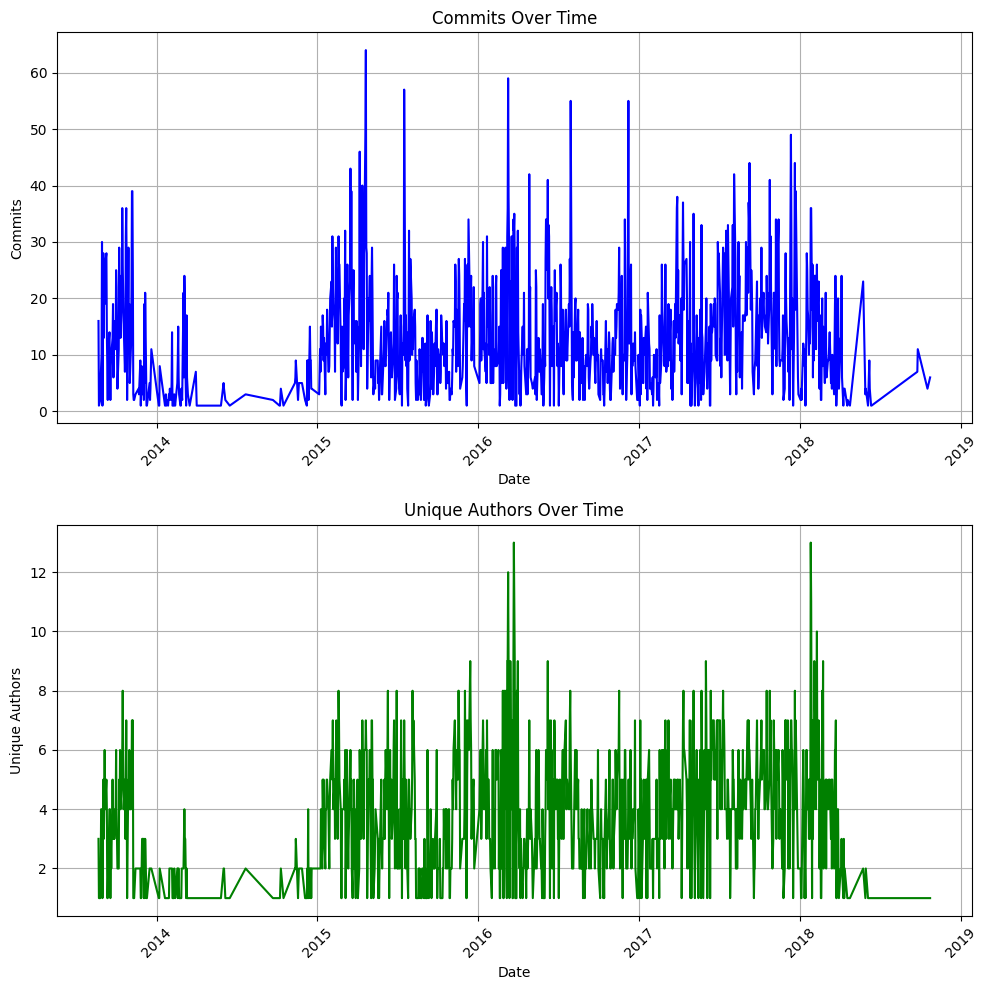

In [9]:
# Plotting two separate graphs: one for commits and one for unique authors
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# First graph: Commits over time
ax[0].plot(analysis_df.index, analysis_df['commits'], label='Commits', color='blue')
ax[0].set_title('Commits Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Commits')
ax[0].grid(True)
ax[0].tick_params(axis='x', rotation=45)

# Second graph: Unique authors over time
ax[1].plot(analysis_df.index, analysis_df['unique_authors'], label='Unique Authors', color='green')
ax[1].set_title('Unique Authors Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Unique Authors')
ax[1].grid(True)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
